# Summer Olympics Data Analysis Assignment 

Intially, we need to import the required libraries and the dataset which we'll be working on. So, lets import them. 

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('summer.csv')


In [36]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


### 1. In how many cities Summer Olympics is held so far?

Now coming to the actual code for finding out the number of cities where the summer olympics was held,


*   Firstly, get all the unique cities where the Summer Olympics was held.
*   And then, find the number of these cities using len() function. 



In [37]:
len(df['City'].unique())

22

👉 Therefore, summer olympics has been held in 22 cities so far!

### 2. Which sport is having most number of Gold Medals so far? (Top 5)

The first step to answer this question is analysing what all sports are there. So lets find out that.

In [38]:
data = df[df['Medal'] == 'Gold']
data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold


Displaying the top 5 sports having most number of Gold medals. 

In [40]:
data.groupby('Sport').count()['Medal'].sort_values(ascending = False).head()

Sport
Aquatics      1421
Athletics     1215
Rowing         890
Gymnastics     820
Fencing        552
Name: Medal, dtype: int64

Now plot the graph for these top 5 sports. 

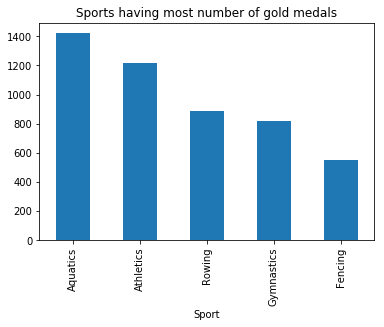

In [41]:
data.groupby('Sport').count()['Medal'].sort_values(ascending = False).head().plot.bar(title="Sports having most number of gold medals")

👉 And hence as we can see from the bar graph, **Aquatics** has most number of gold medals so far. 

### 3. Which sport is having most number of medals so far? (Top 5)

The first step is to idenify all the unique sports. So lets do that. 

In [42]:
df['Sport'].unique()

array(['Aquatics', 'Athletics', 'Cycling', 'Fencing', 'Gymnastics',
       'Shooting', 'Tennis', 'Weightlifting', 'Wrestling', 'Archery',
       'Basque Pelota', 'Cricket', 'Croquet', 'Equestrian', 'Football',
       'Golf', 'Polo', 'Rowing', 'Rugby', 'Sailing', 'Tug of War',
       'Boxing', 'Lacrosse', 'Roque', 'Hockey', 'Jeu de paume', 'Rackets',
       'Skating', 'Water Motorsports', 'Modern Pentathlon', 'Ice Hockey',
       'Basketball', 'Canoe / Kayak', 'Handball', 'Judo', 'Volleyball',
       'Table Tennis', 'Badminton', 'Baseball', 'Softball', 'Taekwondo',
       'Triathlon', 'Canoe'], dtype=object)

In [46]:
data = []
for sport in df['Sport'].unique():
  data.append([sport, len(df[df['Sport'] == sport])])
data = pd.DataFrame(data, columns = ['Sport', 'Medal'])
data = data.sort_values(by = 'Medal', ascending = False).head()
data.head()

,Sport,Medal
0,Aquatics,4170
1,Athletics,3638
17,Rowing,2667
4,Gymnastics,2307
3,Fencing,1613


<Figure size 1080x576 with 0 Axes>

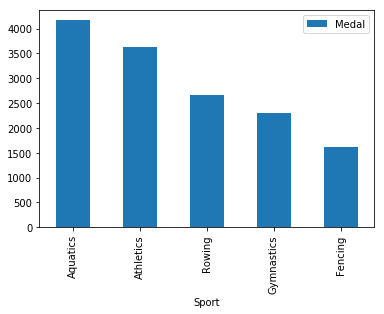

In [49]:
plt.figure(figsize = (15,8))
data.plot(x = 'Sport', y = 'Medal', kind = 'bar')
plt.show()

👉 Therefore observing from the graph,

**Aquatics** is the sport having most number of medals, i.e,  4170 medals.

### 4. Which player has won most number of medals? (Top 5)

Displaying the top 5 athletes with most number of medals. 

In [56]:
data = df.groupby('Athlete').count()['Medal'].sort_values(ascending = False).head()
data.head()

Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
SHAKHLIN, Boris         13
Name: Medal, dtype: int64

Now, plot a graph for these top 5 athletes. 

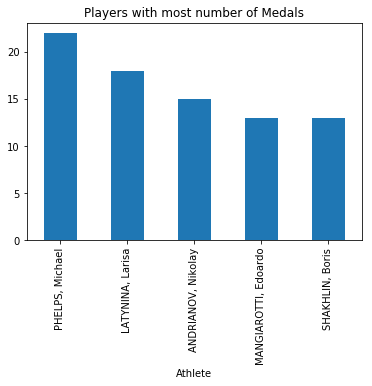

In [57]:
df.groupby('Athlete').count()['Medal'].sort_values(ascending = False).head().plot.bar(title="Players with most number of Medals")

👉 Therefore observing from the graph,

   PHELPS, Michael (i.e. Michael Phelps) is the player who has won most number  of Medals = 22

### 5. Which player has won most number Gold Medals of medals? (Top 5)

 

1.   Firstly, we need to get the rows only having gold medals.
2.   And then using the groupby() function we need to group using Athletes and count the number of medals for each athlete using the count() function. Finally, we can sort the values to get the top 5 players with most number of gold medals.



Displaying the top 5 players with most number of gold medals.

In [65]:
data = df[df['Medal'] == 'Gold']
data.groupby('Athlete').count()['Medal'].sort_values(ascending = False).head()

Athlete
PHELPS, Michael     18
NURMI, Paavo         9
SPITZ, Mark          9
LEWIS, Carl          9
LATYNINA, Larisa     9
Name: Medal, dtype: int64

Lets, plot a graph for these top 5 players with most number of gold medals.

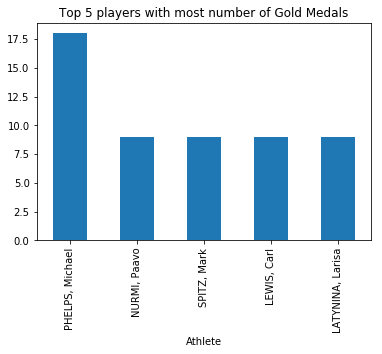

In [66]:
data.groupby('Athlete').count()['Medal'].sort_values(ascending = False).head().plot.bar(title="Top 5 players with most number of Gold Medals")

👉 Therefore observing from the data and the graph,

PHELPS, Michael (i.e. Michael Phelps) is the player who has won most number of Gold Medals = 18

### 6. In which year India won first Gold Medal in Summer Olympics?

In [70]:
data = df[df['Medal'] == 'Gold']
data[(data['Country'] == 'IND') & (data['Medal'] == 'Gold')]['Year'].min()

1928

👉 Hence, India own its first Gold Medal in Summer Olympics in the year 1928

### 7. Which event is most popular in terms on number of players? (Top 5)

Displaying the top 5 events in terms of number of players. 

In [71]:
df.groupby('Event').count()['Athlete'].sort_values(ascending = False).head()

Event
Football            1497
Hockey              1422
Team Competition    1147
Basketball          1012
Handball             973
Name: Athlete, dtype: int64

Plotting a graph for the above top 5 events.

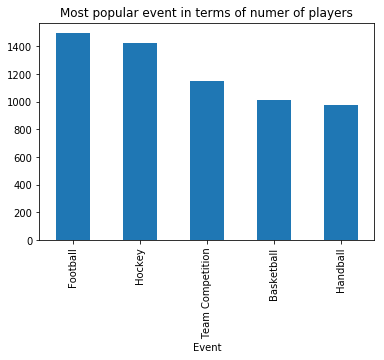

In [73]:
df.groupby('Event').count()['Athlete'].sort_values(ascending = False).head().plot.bar(title="Most popular event in terms of numer of players")

👉 Therefore, **Football** is the most popular event in terms of number of players as there were 1497 athletes in it. 

### 8. Which sport is having most female Gold Medalists? (Top 5)

Displaying the top 5 sports having most number of female Gold Medalists. 

In [76]:
women=df[(df['Gender'] == 'Women')&(df['Medal'] == 'Gold')]
women.groupby('Sport').count()['Medal'].sort_values(ascending = False).head()

Sport
Aquatics      589
Athletics     389
Gymnastics    268
Rowing        217
Volleyball    166
Name: Medal, dtype: int64

Now, lets plot a graph for these top 5 sports.

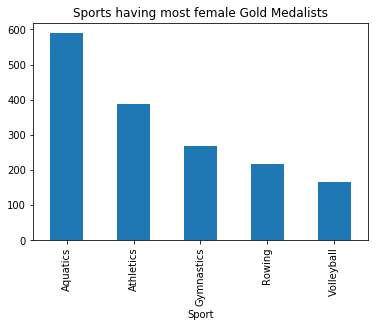

In [77]:
women.groupby('Sport').count()['Medal'].sort_values(ascending = False).head().plot.bar(title="Sports having most female Gold Medalists")

👉 Therefore, Aquatics is the sport with most number of Female Gold Medalists